In [1]:
import numpy as np

In [2]:
from thesis_v2.data.prepared import cadena_plos_cb19

In [3]:
imgs = cadena_plos_cb19.images()
imgs50 = cadena_plos_cb19.images(px_kept=100, final_size=50)
imgs50debug = cadena_plos_cb19.images(px_kept=100, final_size=50, force_resize=True)
imgs50another = cadena_plos_cb19.images(px_kept=80, final_size=50, force_resize=True)

use resize; not optimal for image quality


In [4]:
imgs.shape, imgs50.shape, imgs50debug.shape, imgs50another.shape

((7250, 1, 40, 40), (7250, 1, 50, 50), (7250, 1, 50, 50), (7250, 1, 50, 50))

In [5]:
assert np.array_equal(imgs50, imgs50debug)

In [6]:
data = cadena_plos_cb19.get_raw_pkl()

In [7]:
data['image_numbers'].ravel().shape

(7250,)

In [8]:
import numpy as np
np.array_equal(data['image_ids'].ravel(), np.arange(1,7251))

True

In [9]:
imgs.shape

(7250, 1, 40, 40)

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

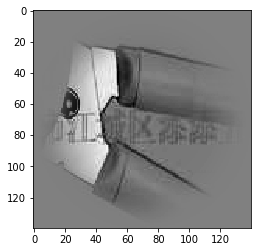

In [11]:
plt.imshow(data['images'][0], vmin=0,vmax=255, cmap='gray')

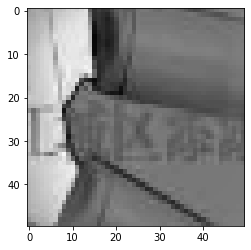

In [12]:
plt.imshow(imgs50another[0][0], vmin=0,vmax=255, cmap='gray')

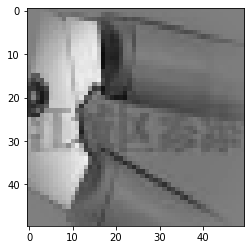

In [13]:
plt.imshow(imgs50[0][0], vmin=0,vmax=255, cmap='gray')

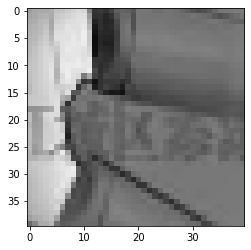

In [14]:
plt.imshow(imgs[0][0], vmin=0,vmax=255, cmap='gray')

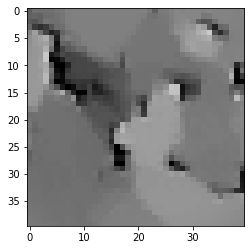

In [15]:
plt.imshow(imgs[1][0], vmin=0,vmax=255, cmap='gray')

In [16]:
b=cadena_plos_cb19.get_neural_data()

In [17]:
b.shape

(7250, 115)

In [18]:
b.mean(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
b.min()

0.0

In [20]:
b.max()

43.355481727574755

In [21]:
(b==0).mean()

0.20256431784107945

(array([2.63583e+05, 1.80386e+05, 1.56135e+05, 1.01747e+05, 5.79010e+04,
        2.87860e+04, 1.36800e+04, 8.74500e+03, 7.09200e+03, 3.36200e+03,
        1.95600e+03, 2.92600e+03, 1.71400e+03, 1.08400e+03, 6.61000e+02,
        6.21000e+02, 5.78000e+02, 3.61000e+02, 2.95000e+02, 2.09000e+02,
        2.46000e+02, 1.83000e+02, 3.55000e+02, 2.16000e+02, 1.27000e+02,
        6.30000e+01, 7.40000e+01, 5.30000e+01, 7.10000e+01, 2.60000e+01,
        3.60000e+01, 4.10000e+01, 1.90000e+01, 8.60000e+01, 1.60000e+01,
        7.50000e+01, 2.40000e+01, 1.10000e+01, 6.00000e+00, 4.00000e+00,
        9.00000e+00, 6.00000e+00, 1.10000e+01, 1.00000e+00, 4.60000e+01,
        1.20000e+01, 1.00000e+00, 2.90000e+01, 3.00000e+00, 3.00000e+00,
        5.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        1.20000e+01, 2.00000e+00, 1.00000e+00, 0.00000e+00, 2.20000e+01,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 4.00000e+00, 0.00000e+00, 1.00

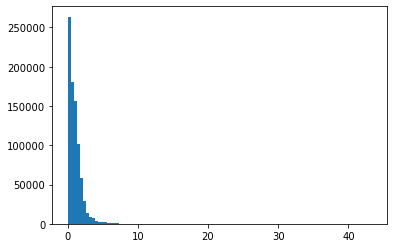

In [22]:
plt.hist(b.ravel(), bins=100)

In [23]:
c = cadena_plos_cb19.get_indices(seed=0)

In [24]:
for z in c:
    print(z, c[z].shape)

labels (7250,)
groups (7250,)
idx_train (4640,)
idx_val (1160,)
idx_test (1450,)


In [25]:
s1=set(c['groups'][c['idx_train']])
s2=set(c['groups'][c['idx_val']])
s3=set(c['groups'][c['idx_test']])

In [26]:
assert (s1 | s2 | s3) == set(range(1,1450+1))
assert (s1 & s2) == set()
assert (s2 & s3) == set()
assert (s1 & s3) == set()

In [27]:
data_all = cadena_plos_cb19.get_data(px_kept=80,final_size=40,seed=0)

In [28]:
for zzzz in data_all:
    print(zzzz.dtype, zzzz.shape, zzzz.mean(), zzzz.std(), zzzz.min(), zzzz.max())

float32 (4640, 1, 40, 40) 112.3707 41.85086 0.0 255.0
float64 (4640, 115) 0.9997886347847456 1.1200904471614856 0.0 43.355481727574755
float32 (1160, 1, 40, 40) 112.594635 42.224922 0.0 255.0
float64 (1160, 115) 0.9958200794879527 1.1349541115933623 0.0 43.355481727574755
float32 (1450, 1, 40, 40) 112.25153 41.926292 0.0 255.0
float64 (1450, 115) 1.0040203050984517 1.1187814728153749 0.0 36.40602582496413


In [29]:
data_all_scaled = cadena_plos_cb19.get_data(px_kept=80,final_size=40,seed=0,scale=0.5)

In [30]:
for zzzz2 in data_all_scaled:
    print(zzzz2.dtype, zzzz2.shape, zzzz2.mean(), zzzz2.std(), zzzz2.min(), zzzz2.max())

float32 (4640, 1, 40, 40) 112.3707 41.85086 0.0 255.0
float64 (4640, 115) 0.4998943173923728 0.5600452235807428 0.0 21.677740863787378
float32 (1160, 1, 40, 40) 112.594635 42.224922 0.0 255.0
float64 (1160, 115) 0.49791003974397635 0.5674770557966812 0.0 21.677740863787378
float32 (1450, 1, 40, 40) 112.25153 41.926292 0.0 255.0
float64 (1450, 115) 0.5020101525492259 0.5593907364076874 0.0 18.203012912482066


In [31]:
# check how to best compute ccmax

from strflab.stats import cc_max

In [32]:
cc_max_zero = cc_max(cadena_plos_cb19.get_neural_data_per_trial(fill_value='zero'))

In [33]:
cc_max_zero.shape

(115,)

In [34]:
cc_max_avg = cc_max(cadena_plos_cb19.get_neural_data_per_trial(fill_value='avg-over-valid-trials'))

In [35]:
cc_max_avg.shape

(115,)

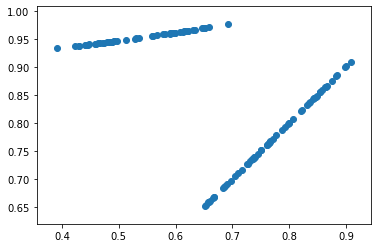

In [36]:
plt.scatter(cc_max_zero, cc_max_avg)

In [37]:
from scipy.stats import pearsonr

In [38]:
pearsonr(cc_max_avg, cc_max_zero)

(-0.48012276784629954, 5.6427531092694415e-08)

In [39]:
# using avg increase ccmax for a lot of neurons to be very very high. let's use cc_max_zero.
cc_max_avg - cc_max_zero

array([0.395949  , 0.51396878, 0.41607618, 0.34679112, 0.31727669,
       0.36903576, 0.45649503, 0.31213379, 0.45394657, 0.48166028,
       0.33161907, 0.49468733, 0.28370038, 0.45404299, 0.31850658,
       0.49222961, 0.42162817, 0.54282721, 0.46509645, 0.36721784,
       0.43619354, 0.35060555, 0.47066955, 0.48321917, 0.37914609,
       0.50805589, 0.46994057, 0.44986617, 0.36420118, 0.49666047,
       0.47895953, 0.32184056, 0.3421078 , 0.31916666, 0.36935879,
       0.353949  , 0.49849596, 0.42076939, 0.335773  , 0.45734234,
       0.46185903, 0.3770301 , 0.47557181, 0.45921364, 0.39472383,
       0.50856046, 0.36218331, 0.38810929, 0.36226543, 0.3481273 ,
       0.34253036, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [40]:
eeee=cadena_plos_cb19.get_neural_data_per_trial(fill_value='zero')

In [41]:
eeee.shape

(115, 4, 7250)

In [42]:
pearsonr(eeee.mean(axis=1).T.ravel(), cadena_plos_cb19.get_neural_data(unit_mean_per_neuron=False).ravel())

(0.9369122781382335, 0.0)